In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import json
import platform
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

## 원본 데이터 불러오기

In [39]:
### 강원도 인구수 불러오기
file_path="./행정구역_시군구_별__성별_인구수_20230613103911.csv"
population=pd.read_csv(file_path, encoding="euc-kr")
population

,행정구역(시군구)별,2023.03,2023.03.1,2023.03.2,2023.04,2023.04.1,2023.04.2,2023.05,2023.05.1,2023.05.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,강원도,1533719,771574,762145,1533356,771382,761974,1533081,771322,761759
2,춘천시,286850,141586,145264,286743,141519,145224,286854,141555,145299
3,원주시,360752,178847,181905,360974,178935,182039,361030,179001,182029
4,강릉시,210678,104419,106259,210630,104403,106227,210558,104361,106197
5,동해시,89186,45323,43863,89150,45303,43847,89144,45302,43842
6,태백시,39050,19678,19372,39006,19650,19356,38929,19618,19311
7,속초시,82541,40885,41656,82499,40867,41632,82521,40876,41645
8,삼척시,63487,32220,31267,63444,32193,31251,63359,32145,31214
9,홍천군,67759,34845,32914,67661,34824,32837,67649,34864,32785


In [53]:
population = population.drop(1)

([<matplotlib.patches.Wedge at 0x17ba5d7ab20>,
 [Text(0.9155197574246137, 0.6097733790230405, '춘천시'),
  Text(-0.370243597184829, 1.0358183618490446, '원주시'),
  Text(-1.0982122857272743, 0.06268792130607122, '강릉시'),
  Text(-0.9336092992666284, -0.5816989567833825, '동해시'),
  Text(-0.7505409986969197, -0.8041692665571288, '태백시'),
  Text(-0.5291597262089358, -0.9643598831133967, '속초시'),
  Text(-0.2214899027801278, -1.0774702886699243, '삼척시'),
  Text(0.07265397993753053, -1.0975980134818197, '홍천군'),
  Text(0.32547932252691325, -1.0507441223282772, '횡성군'),
  Text(0.5011306762342935, -0.9792180785386675, '영월군'),
  Text(0.651338903906919, -0.8864297108385604, '평창군'),
  Text(0.7801794448141038, -0.7754482793130415, '정선군'),
  Text(0.891969397190946, -0.6437317721495659, '철원군'),
  Text(0.9696771488857672, -0.5193517371962569, '화천군'),
  Text(1.012921402120027, -0.42894082706965403, '양구군'),
  Text(1.053718663500071, -0.3157166105728747, '인제군'),
  Text(1.084188442321258, -0.18583708332032217, '고성군'),

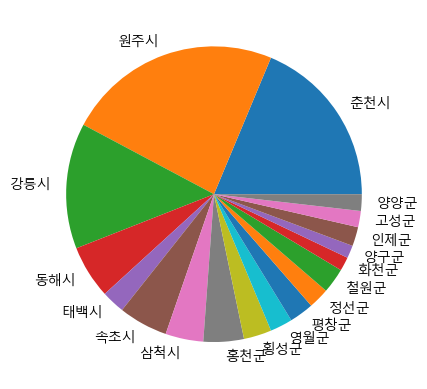

In [55]:
plt.pie(population["2023.03"], labels=population["행정구역(시군구)별"])

In [2]:
### 데이터1: 음식 업종 소비트렌드
# - 이 데이터를 기준으로 사용할 예정
file_path="./2023_강원도_성별_연령대별_업종별_소비트랜드/강원도 성별 연령대별 음식 업종 소비트렌드_202304.csv"
df_food=pd.read_csv(file_path, encoding="euc-kr")
df_food

,기준년월,광역시도명,시군구명,남녀구분,음식_연령구분,음식_이용금액,음식_이용건수
0,202304,강원도,강릉시,여,20대이하,57222380,1683
1,202304,강원도,강릉시,남,20대이하,55436280,1477
2,202304,강원도,강릉시,남,30대,156591208,3978
3,202304,강원도,강릉시,여,30대,143047939,4045
4,202304,강원도,강릉시,남,40대,286248655,7456
...,...,...,...,...,...,...,...
175,202304,강원도,횡성군,여,40대,24659362,751
176,202304,강원도,횡성군,남,50대,41784426,1027
177,202304,강원도,횡성군,여,50대,37105188,969
178,202304,강원도,횡성군,남,60대이상,32687080,842


In [35]:
food_pivot = df_food.pivot_table(values="음식_이용건수",
                                   index="시군구명",
                                   columns="음식_연령구분",
                                   aggfunc= "sum")

([<matplotlib.axis.XTick at 0x17ba18f5670>,
 [Text(0, 0, '강릉시'),
  Text(1, 0, '고성군'),
  Text(2, 0, '동해시'),
  Text(3, 0, '삼척시'),
  Text(4, 0, '속초시'),
  Text(5, 0, '양구군'),
  Text(6, 0, '양양군'),
  Text(7, 0, '영월군'),
  Text(8, 0, '원주시'),
  Text(9, 0, '인제군'),
  Text(10, 0, '정선군'),
  Text(11, 0, '철원군'),
  Text(12, 0, '춘천시'),
  Text(13, 0, '태백시'),
  Text(14, 0, '평창군'),
  Text(15, 0, '홍천군'),
  Text(16, 0, '화천군'),
  Text(17, 0, '횡성군')])

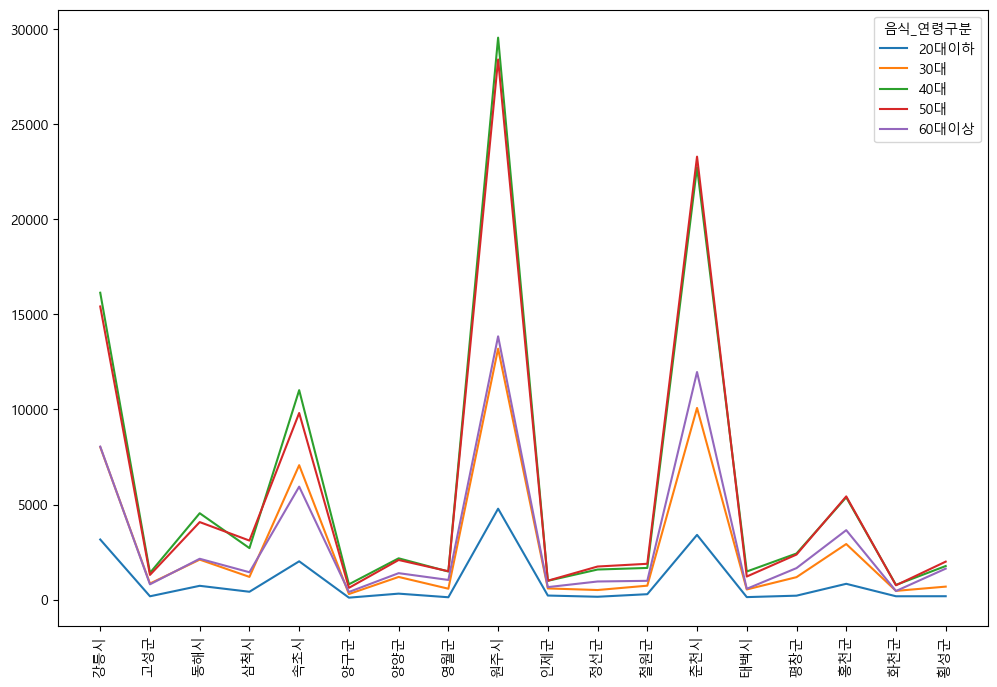

In [38]:
food_pivot_new = food_pivot.reset_index()
food_pivot_new.plot(figsize=(12, 8))
plt.xticks(range(len(food_pivot_new)),food_pivot_new["시군구명"], rotation=90)

In [3]:
### 데이터2: 커피 업종 소비트렌드
file_path="./2023_강원도_성별_연령대별_업종별_소비트랜드/강원도 성별 연령대별 커피전문점 업종 소비트렌드_202304.csv"
df_coffee=pd.read_csv(file_path, encoding="euc-kr")
df_coffee

,기준년월,광역시도명,시군구명,남녀구분,연령구분,이용금액,이용건수
0,202304,강원도,강릉시,여,20대이하,13913120,1093
1,202304,강원도,강릉시,남,20대이하,7932360,732
2,202304,강원도,강릉시,여,30대,28239500,2223
3,202304,강원도,강릉시,남,30대,18791640,1621
4,202304,강원도,강릉시,여,40대,43439830,3791
...,...,...,...,...,...,...,...
175,202304,강원도,횡성군,남,40대,1871600,200
176,202304,강원도,횡성군,여,50대,6649690,307
177,202304,강원도,횡성군,남,50대,2612250,206
178,202304,강원도,횡성군,남,60대이상,1479600,129


In [4]:
### 데이터3: 오락위락시설 업종 소비트렌드
file_path="./2023_강원도_성별_연령대별_업종별_소비트랜드/강원도 성별 연령대별 오락위락시설 업종 소비트렌드_202301.csv"
df_entertainment=pd.read_csv(file_path, encoding="euc-kr")
df_entertainment

,기준년월,광역시도명,시군구명,업종명,남녀구분,연령구분,오락위락시설_이용금액,오락위락시설_이용건수
0,202301,강원도,강릉시,오락위락시설,여,20대이하,1692400.0,152
1,202301,강원도,강릉시,오락위락시설,남,20대이하,2316300.0,315
2,202301,강원도,강릉시,오락위락시설,남,30대,3445200.0,229
3,202301,강원도,강릉시,오락위락시설,여,30대,3794100.0,147
4,202301,강원도,강릉시,오락위락시설,남,40대,4319800.0,204
...,...,...,...,...,...,...,...,...
154,202301,강원도,횡성군,오락위락시설,남,40대,839300.0,50
155,202301,강원도,횡성군,오락위락시설,여,50대,167900.0,18
156,202301,강원도,횡성군,오락위락시설,남,50대,331000.0,6
157,202301,강원도,횡성군,오락위락시설,남,60대이상,200000.0,3


In [5]:
### 데이터4: 레져업종 소비트렌드
file_path="./2023_강원도_성별_연령대별_업종별_소비트랜드/강원도 성별 연령대별 레져업소 업종 소비트렌드_202304.csv"
df_lesiure=pd.read_csv(file_path, encoding="euc-kr")
df_lesiure

,기준년월,광역시도명,시군구명,남녀구분,연령구분,레져_결제금액,레져_결제건수
0,202304,강원도,강릉시,남,20대이하,3388000.0,52
1,202304,강원도,강릉시,여,20대이하,5199550.0,27
2,202304,강원도,강릉시,남,30대,6325540.0,143
3,202304,강원도,강릉시,여,30대,6493550.0,69
4,202304,강원도,강릉시,남,40대,21430900.0,350
...,...,...,...,...,...,...,...
165,202304,강원도,횡성군,여,40대,19983600.0,125
166,202304,강원도,횡성군,여,50대,50986450.0,320
167,202304,강원도,횡성군,남,50대,49606900.0,277
168,202304,강원도,횡성군,여,60대이상,21962500.0,150


In [6]:
### 데이터5: 숙박업종 소비트렌드
file_path="./2023_강원도_성별_연령대별_업종별_소비트랜드/강원도 성별 연령대별 숙박 업종 소비트렌드_202304.csv"
df_lodgment=pd.read_csv(file_path, encoding="ANSI")
df_lodgment

,기준년월,광역시도명,시군구명,업종명,남녀구분,연령구분,숙박_이용금액,숙박_이용건수
0,202304,강원도,강릉시,숙박,남,20대이하,3701300,95
1,202304,강원도,강릉시,숙박,여,20대이하,6638350,136
2,202304,강원도,강릉시,숙박,여,30대,23020378,365
3,202304,강원도,강릉시,숙박,남,30대,25306787,295
4,202304,강원도,강릉시,숙박,여,40대,36787944,517
...,...,...,...,...,...,...,...,...
166,202304,강원도,횡성군,숙박,여,40대,5033340,70
167,202304,강원도,횡성군,숙박,여,50대,2612340,47
168,202304,강원도,횡성군,숙박,남,50대,10433420,67
169,202304,강원도,횡성군,숙박,여,60대이상,1425540,30


## 남녀구분 없애고, 이용금액&건수 합치기

### 1. df_food 성별컬럼 삭제 및 금액&건수 합하기&중복행 제거

In [7]:
### 특정 시군구명&연령구분에 해당하는 값 더하기
# - 새 데이터프레임 명: df_food_new

sgg_list=df_food["시군구명"].unique()
age_list=df_food["음식_연령구분"].unique()
df_food_new=pd.DataFrame()

for a in sgg_list:
    for b in age_list:
        df_temp=df_food[(df_food["시군구명"]==a)&(df_food["음식_연령구분"]==b)==True]
        df_temp.loc[ : , "음식_이용금액"]=df_temp.loc[ : , "음식_이용금액"].sum()
        df_temp.loc[ : , "음식_이용건수"]=df_temp.loc[ : , "음식_이용건수"].sum()
        df_food_new=pd.concat([df_food_new, df_temp], ignore_index=True)
            
df_food_new

,기준년월,광역시도명,시군구명,남녀구분,음식_연령구분,음식_이용금액,음식_이용건수
0,202304,강원도,강릉시,여,20대이하,112658660,3160
1,202304,강원도,강릉시,남,20대이하,112658660,3160
2,202304,강원도,강릉시,남,30대,299639147,8023
3,202304,강원도,강릉시,여,30대,299639147,8023
4,202304,강원도,강릉시,남,40대,593809483,16138
...,...,...,...,...,...,...,...
175,202304,강원도,횡성군,여,40대,62803550,1765
176,202304,강원도,횡성군,남,50대,78889614,1996
177,202304,강원도,횡성군,여,50대,78889614,1996
178,202304,강원도,횡성군,남,60대이상,65063636,1628


In [8]:
### 성별컬럼 제거
del(df_food_new["남녀구분"])

In [9]:
### 중복값 제거 및 익덱스 초기화
## 중복값: 음식_이용금액, 음식_이용건수

df_food_new=df_food_new.drop_duplicates().reset_index(drop=True)
df_food_new

,기준년월,광역시도명,시군구명,음식_연령구분,음식_이용금액,음식_이용건수
0,202304,강원도,강릉시,20대이하,112658660,3160
1,202304,강원도,강릉시,30대,299639147,8023
2,202304,강원도,강릉시,40대,593809483,16138
3,202304,강원도,강릉시,50대,580226997,15415
4,202304,강원도,강릉시,60대이상,338960424,8045
...,...,...,...,...,...,...
85,202304,강원도,횡성군,20대이하,6897246,177
86,202304,강원도,횡성군,30대,26291710,682
87,202304,강원도,횡성군,40대,62803550,1765
88,202304,강원도,횡성군,50대,78889614,1996


In [10]:
df_food_new

,기준년월,광역시도명,시군구명,음식_연령구분,음식_이용금액,음식_이용건수
0,202304,강원도,강릉시,20대이하,112658660,3160
1,202304,강원도,강릉시,30대,299639147,8023
2,202304,강원도,강릉시,40대,593809483,16138
3,202304,강원도,강릉시,50대,580226997,15415
4,202304,강원도,강릉시,60대이상,338960424,8045
...,...,...,...,...,...,...
85,202304,강원도,횡성군,20대이하,6897246,177
86,202304,강원도,횡성군,30대,26291710,682
87,202304,강원도,횡성군,40대,62803550,1765
88,202304,강원도,횡성군,50대,78889614,1996


### 2. df_coffee 성별컬럼 삭제 및 금액&건수 합하기&중복행 제거

In [11]:
### 특정 시군구명&연령구분에 해당하는 값 더하기
# - 새 데이터프레임 명: df_coffee_new

sgg_list2=df_coffee["시군구명"].unique()
age_list2=df_coffee["연령구분"].unique()
df_coffee_new=pd.DataFrame()

for a in sgg_list2:
    for b in age_list2:
        df_temp2=df_coffee[(df_coffee["시군구명"]==a)&(df_coffee["연령구분"]==b)==True]
        df_temp2.loc[ : , "이용금액"]=df_temp2.loc[ : , "이용금액"].sum()
        df_temp2.loc[ : , "이용건수"]=df_temp2.loc[ : , "이용건수"].sum()
        df_coffee_new=pd.concat([df_coffee_new, df_temp2], ignore_index=True)
            
df_coffee_new

,기준년월,광역시도명,시군구명,남녀구분,연령구분,이용금액,이용건수
0,202304,강원도,강릉시,여,20대이하,21845480,1825
1,202304,강원도,강릉시,남,20대이하,21845480,1825
2,202304,강원도,강릉시,여,30대,47031140,3844
3,202304,강원도,강릉시,남,30대,47031140,3844
4,202304,강원도,강릉시,여,40대,69776385,6072
...,...,...,...,...,...,...,...
175,202304,강원도,횡성군,남,40대,6756300,559
176,202304,강원도,횡성군,여,50대,9261940,513
177,202304,강원도,횡성군,남,50대,9261940,513
178,202304,강원도,횡성군,남,60대이상,3142750,268


In [12]:
### 성별컬럼 제거
del(df_coffee_new["남녀구분"])

In [13]:
### 중복값 제거 및 익덱스 초기화
## 중복값: 이용금액, 이용건수

df_coffee_new = df_coffee_new.drop_duplicates().reset_index(drop=True)
df_coffee_new

,기준년월,광역시도명,시군구명,연령구분,이용금액,이용건수
0,202304,강원도,강릉시,20대이하,21845480,1825
1,202304,강원도,강릉시,30대,47031140,3844
2,202304,강원도,강릉시,40대,69776385,6072
3,202304,강원도,강릉시,50대,63769449,5391
4,202304,강원도,강릉시,60대이상,28207540,2118
...,...,...,...,...,...,...
85,202304,강원도,횡성군,20대이하,962400,132
86,202304,강원도,횡성군,30대,3579540,335
87,202304,강원도,횡성군,40대,6756300,559
88,202304,강원도,횡성군,50대,9261940,513


In [14]:
### 이용금액/건수 -> 커피_이용금액/건수로 컬럼명 변경
df_coffee_new.loc[:, "커피_이용금액"]=df_coffee_new.loc[:,"이용금액"]
df_coffee_new.loc[:, "커피_이용건수"]=df_coffee_new.loc[:,"이용건수"]

In [15]:
df_coffee_new

,기준년월,광역시도명,시군구명,연령구분,이용금액,이용건수,커피_이용금액,커피_이용건수
0,202304,강원도,강릉시,20대이하,21845480,1825,21845480,1825
1,202304,강원도,강릉시,30대,47031140,3844,47031140,3844
2,202304,강원도,강릉시,40대,69776385,6072,69776385,6072
3,202304,강원도,강릉시,50대,63769449,5391,63769449,5391
4,202304,강원도,강릉시,60대이상,28207540,2118,28207540,2118
...,...,...,...,...,...,...,...,...
85,202304,강원도,횡성군,20대이하,962400,132,962400,132
86,202304,강원도,횡성군,30대,3579540,335,3579540,335
87,202304,강원도,횡성군,40대,6756300,559,6756300,559
88,202304,강원도,횡성군,50대,9261940,513,9261940,513


In [16]:
### 이름 바꾸면서 생긴 중복 행 제거
del(df_coffee_new["이용금액"])
del(df_coffee_new["이용건수"])

In [17]:
df_coffee_new

,기준년월,광역시도명,시군구명,연령구분,커피_이용금액,커피_이용건수
0,202304,강원도,강릉시,20대이하,21845480,1825
1,202304,강원도,강릉시,30대,47031140,3844
2,202304,강원도,강릉시,40대,69776385,6072
3,202304,강원도,강릉시,50대,63769449,5391
4,202304,강원도,강릉시,60대이상,28207540,2118
...,...,...,...,...,...,...
85,202304,강원도,횡성군,20대이하,962400,132
86,202304,강원도,횡성군,30대,3579540,335
87,202304,강원도,횡성군,40대,6756300,559
88,202304,강원도,횡성군,50대,9261940,513


### 3.df_entertainment 성별컬럼 삭제 및 금액&건수 합하기&중복행 제거

In [18]:
df_entertainment

,기준년월,광역시도명,시군구명,업종명,남녀구분,연령구분,오락위락시설_이용금액,오락위락시설_이용건수
0,202301,강원도,강릉시,오락위락시설,여,20대이하,1692400.0,152
1,202301,강원도,강릉시,오락위락시설,남,20대이하,2316300.0,315
2,202301,강원도,강릉시,오락위락시설,남,30대,3445200.0,229
3,202301,강원도,강릉시,오락위락시설,여,30대,3794100.0,147
4,202301,강원도,강릉시,오락위락시설,남,40대,4319800.0,204
...,...,...,...,...,...,...,...,...
154,202301,강원도,횡성군,오락위락시설,남,40대,839300.0,50
155,202301,강원도,횡성군,오락위락시설,여,50대,167900.0,18
156,202301,강원도,횡성군,오락위락시설,남,50대,331000.0,6
157,202301,강원도,횡성군,오락위락시설,남,60대이상,200000.0,3


In [19]:
### 업종명 컬럼 제거
# - 다른파일은 엑셀에서 지웠는데 이건 안지웠었음....
del(df_entertainment["업종명"])

In [20]:
### 특정 시군구명&연령구분에 해당하는 값 더하기
# - 새 데이터프레임 명: df_coffee_new

sgg_list3=df_entertainment["시군구명"].unique()
age_list3=df_entertainment["연령구분"].unique()
df_entertainment_new=pd.DataFrame()

for a in sgg_list3:
    for b in age_list3:
        df_temp3=df_entertainment[(df_entertainment["시군구명"]==a)&(df_entertainment["연령구분"]==b)==True]
        df_temp3.loc[ : , "오락위락시설_이용금액"]=df_temp3.loc[ : , "오락위락시설_이용금액"].sum()
        df_temp3.loc[ : , "오락위락시설_이용건수"]=df_temp3.loc[ : , "오락위락시설_이용건수"].sum()
        df_entertainment_new=pd.concat([df_entertainment_new, df_temp3], ignore_index=True)
            
df_entertainment_new

,기준년월,광역시도명,시군구명,남녀구분,연령구분,오락위락시설_이용금액,오락위락시설_이용건수
0,202301,강원도,강릉시,여,20대이하,4008700.0,467
1,202301,강원도,강릉시,남,20대이하,4008700.0,467
2,202301,강원도,강릉시,남,30대,7239300.0,376
3,202301,강원도,강릉시,여,30대,7239300.0,376
4,202301,강원도,강릉시,남,40대,9003700.0,574
...,...,...,...,...,...,...,...
154,202301,강원도,횡성군,남,40대,985300.0,64
155,202301,강원도,횡성군,여,50대,498900.0,24
156,202301,강원도,횡성군,남,50대,498900.0,24
157,202301,강원도,횡성군,남,60대이상,276000.0,9


In [21]:
### 남녀구분 컬럼 제거
del(df_entertainment_new["남녀구분"])

In [22]:
### 중복열 제거 및 인덱스 재정렬
df_entertainment_new = df_entertainment_new.drop_duplicates().reset_index(drop=True)
df_entertainment_new

,기준년월,광역시도명,시군구명,연령구분,오락위락시설_이용금액,오락위락시설_이용건수
0,202301,강원도,강릉시,20대이하,4008700.0,467
1,202301,강원도,강릉시,30대,7239300.0,376
2,202301,강원도,강릉시,40대,9003700.0,574
3,202301,강원도,강릉시,50대,5749700.0,407
4,202301,강원도,강릉시,60대이상,2007000.0,84
...,...,...,...,...,...,...
81,202301,강원도,횡성군,20대이하,284000.0,5
82,202301,강원도,횡성군,30대,235700.0,18
83,202301,강원도,횡성군,40대,985300.0,64
84,202301,강원도,횡성군,50대,498900.0,24


### 4. df_lesiure 성별컬럼 삭제 및 금액&건수 합하기&중복행 제거

In [23]:
df_lesiure

,기준년월,광역시도명,시군구명,남녀구분,연령구분,레져_결제금액,레져_결제건수
0,202304,강원도,강릉시,남,20대이하,3388000.0,52
1,202304,강원도,강릉시,여,20대이하,5199550.0,27
2,202304,강원도,강릉시,남,30대,6325540.0,143
3,202304,강원도,강릉시,여,30대,6493550.0,69
4,202304,강원도,강릉시,남,40대,21430900.0,350
...,...,...,...,...,...,...,...
165,202304,강원도,횡성군,여,40대,19983600.0,125
166,202304,강원도,횡성군,여,50대,50986450.0,320
167,202304,강원도,횡성군,남,50대,49606900.0,277
168,202304,강원도,횡성군,여,60대이상,21962500.0,150


In [24]:
### 특정 시군구명&연령구분에 해당하는 값 더하기
# - 새 데이터프레임 명: df_coffee_new

sgg_list4=df_lesiure["시군구명"].unique()
age_list4=df_lesiure["연령구분"].unique()
df_lesiure_new=pd.DataFrame()

for a in sgg_list4:
    for b in age_list4:
        df_temp4=df_lesiure[(df_lesiure["시군구명"]==a)&(df_lesiure["연령구분"]==b)==True]
        df_temp4.loc[ : , "레져_결제금액"]=df_temp4.loc[ : , "레져_결제금액"].sum()
        df_temp4.loc[ : , "레져_결제건수"]=df_temp4.loc[ : , "레져_결제건수"].sum()
        df_lesiure_new=pd.concat([df_lesiure_new, df_temp4], ignore_index=True)
            
df_lesiure_new

,기준년월,광역시도명,시군구명,남녀구분,연령구분,레져_결제금액,레져_결제건수
0,202304,강원도,강릉시,남,20대이하,8587550.0,79
1,202304,강원도,강릉시,여,20대이하,8587550.0,79
2,202304,강원도,강릉시,남,30대,12819090.0,212
3,202304,강원도,강릉시,여,30대,12819090.0,212
4,202304,강원도,강릉시,남,40대,40379600.0,581
...,...,...,...,...,...,...,...
165,202304,강원도,횡성군,여,40대,55728100.0,341
166,202304,강원도,횡성군,여,50대,100593350.0,597
167,202304,강원도,횡성군,남,50대,100593350.0,597
168,202304,강원도,횡성군,여,60대이상,53477700.0,321


In [25]:
### 남녀구분 컬럼 제거
del(df_lesiure_new["남녀구분"])

In [26]:
### 중복열 제거 및 인덱스 재정렬
df_lesiure_new = df_lesiure_new.drop_duplicates().reset_index(drop=True)
df_lesiure_new

,기준년월,광역시도명,시군구명,연령구분,레져_결제금액,레져_결제건수
0,202304,강원도,강릉시,20대이하,8587550.0,79
1,202304,강원도,강릉시,30대,12819090.0,212
2,202304,강원도,강릉시,40대,40379600.0,581
3,202304,강원도,강릉시,50대,46453700.0,558
4,202304,강원도,강릉시,60대이상,15955750.0,197
...,...,...,...,...,...,...
84,202304,강원도,횡성군,20대이하,4719800.0,33
85,202304,강원도,횡성군,30대,10341000.0,81
86,202304,강원도,횡성군,40대,55728100.0,341
87,202304,강원도,횡성군,50대,100593350.0,597
